In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
# from shapely.geometry import Point
# import fiona

In [3]:
zoneFile = '/home/urwa/Documents/side_projects/urban/UrbanTemporalNetworks/Data/NYC Taxi Zones/geo_export_2497f8b4-b0ae-4b46-8861-cc53a7ac9b3f.shp'
zones = gpd.GeoDataFrame.from_file(zoneFile)
# zones = pd.read_csv(zoneFile)
zones.head(2)

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."


In [4]:
zones['location_i'] = zones['location_i'].astype(int)

In [5]:
comms = pd.read_csv('/home/urwa/Documents/side_projects/urban/UrbanTemporalNetworks/Data/ZonetoComm.csv')
comms.head(2)

,start_id,start_community
0,1,0.0
1,2,4.2


In [6]:
mapping = dict(zip(comms.start_id, comms.start_community))

In [7]:
zones['community'] = zones['location_i'].apply(lambda x: mapping[x]) 

In [8]:
zones.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,community
0,EWR,1,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",0.0
1,Queens,2,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",4.2
2,Bronx,3,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",2.1
3,Manhattan,4,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",0.2
4,Staten Island,5,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5.1


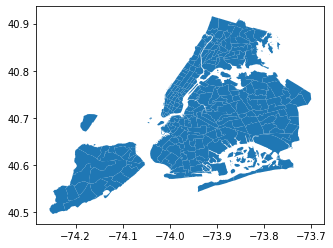

In [9]:
zones.plot()

In [10]:
zones["community"] =zones["community"].astype(str)
zones = zones[["community", 'geometry']].dissolve(by='community', aggfunc=sum)
zones['community'] = zones.index

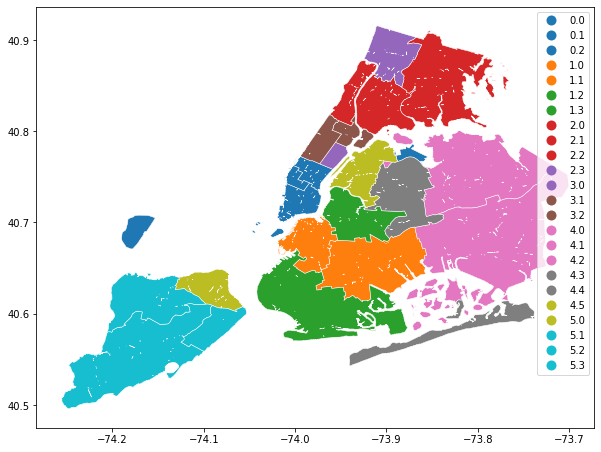

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
zones.plot(column="community", ax=ax, legend=True, linewidth=0.5, edgecolor = 'white')